In [17]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone, BaseEstimator
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib
from sklearn.neighbors import KNeighborsClassifier


In [18]:
mnist: fetch_openml = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [19]:
X: np.ndarray = mnist['data']
y: np.ndarray = mnist['target']

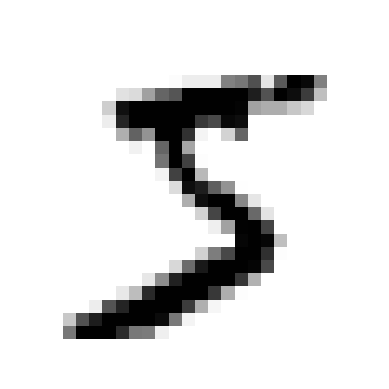

In [20]:
y = y.astype(int)

some_digit: np.ndarray = X.iloc[0].to_numpy()
some_digit_image: np.ndarray = some_digit.reshape(28, 28)

plt.imshow(
    some_digit_image,
    cmap=mpl.cm.binary,
    interpolation='nearest'
)

plt.axis('off')
plt.show()

In [21]:
X_train: np.ndarray = X[:60000]
X_test: np.ndarray = X[60000:]
y_train: np.ndarray = y[:60000]
y_test: np.ndarray = y[60000:]

In [22]:
svm_clf: SVC = SVC()

svm_clf.fit(X_train, y_train)

svm_clf.predict([some_digit])

/home/pcmoraes/Desktop/codigos/Inteligencia-Artificial/Livros/Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5])

In [23]:
some_digits_scores: np.ndarray = svm_clf.decision_function([some_digit])

some_digits_scores

/home/pcmoraes/Desktop/codigos/Inteligencia-Artificial/Livros/Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [24]:
np.argmax(some_digits_scores)

np.int64(5)

In [25]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [26]:
svm_clf.classes_[5]

np.int64(5)

In [27]:
ovr_clf : OneVsRestClassifier = OneVsRestClassifier(SVC())

ovr_clf.fit(X_train, y_train)

ovr_clf.predict([some_digit])

/home/pcmoraes/Desktop/codigos/Inteligencia-Artificial/Livros/Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/pcmoraes/Desktop/codigos/Inteligencia-Artificial/Livros/Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/pcmoraes/Desktop/codigos/Inteligencia-Artificial/Livros/Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/pcmoraes/Desktop/codigos/Inteligencia-Artificial/Livros/Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow/.

array([5])

In [28]:
len(
    ovr_clf.estimators_
)

10

In [29]:
sgd_clf: SGDClassifier = SGDClassifier()

sgd_clf.fit(X_train, y_train)  

sgd_clf.predict([some_digit])

/home/pcmoraes/Desktop/codigos/Inteligencia-Artificial/Livros/Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([5])

In [30]:
sgd_clf.decision_function([some_digit])

/home/pcmoraes/Desktop/codigos/Inteligencia-Artificial/Livros/Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-1.55274626e+04, -2.13665199e+04, -1.03657835e+04,
        -1.77267523e+03, -1.99506167e+04,  1.11083470e+01,
        -2.20995913e+04, -1.62560831e+04, -1.01415293e+04,
        -1.66691563e+04]])

In [31]:
cross_val_score = cross_val_predict(sgd_clf, X_train, y_train, cv=3, method='decision_function')

In [32]:
cross_val_score

array([[-49010.380879  , -76050.99186388, -34816.33265591, ...,
        -28996.75381146, -18691.41631855, -14929.44441939],
       [ 40838.92793234, -71617.92742223, -26532.58928602, ...,
        -30435.15326715, -13682.09656434, -16237.55083266],
       [-57067.65403821, -73712.31087069, -24851.12829111, ...,
        -17308.2936592 , -30625.28738906, -25499.97975026],
       ...,
       [-35870.40004638, -27460.9581874 , -27407.58076231, ...,
        -49501.62421894,  -1844.67569609, -29523.34927438],
       [-24995.21596282, -52709.93953033, -14693.30259527, ...,
        -36712.44612552, -22677.26239936, -14857.05713114],
       [-14203.56369872, -88033.59983011, -24999.09644823, ...,
        -34983.26145631,   6253.63412905,  -1372.36097457]])

In [33]:
scaler: StandardScaler = StandardScaler()

X_train_scaled: np.ndarray = scaler.fit_transform(X_train.astype(np.float64))

In [34]:
cross_val_score = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3, method='decision_function')

/home/pcmoraes/Desktop/codigos/Inteligencia-Artificial/Livros/Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [35]:
y_train_pred : np.ndarray = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

/home/pcmoraes/Desktop/codigos/Inteligencia-Artificial/Livros/Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/pcmoraes/Desktop/codigos/Inteligencia-Artificial/Livros/Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [36]:
conf_mx : np.ndarray = confusion_matrix(y_train, y_train_pred)

In [37]:
conf_mx

array([[5589,    0,   23,    9,    9,   53,   38,    6,  195,    1],
       [   0, 6418,   37,   27,    4,   46,    4,    8,  186,   12],
       [  28,   28, 5261,   99,   71,   30,   66,   38,  327,   10],
       [  24,   18,  117, 5277,    2,  222,   27,   41,  330,   73],
       [  10,   14,   48,   13, 5230,   12,   39,   25,  280,  171],
       [  27,   17,   30,  181,   54, 4523,   74,   16,  437,   62],
       [  30,   16,   43,    5,   45,   96, 5562,    4,  116,    1],
       [  20,   11,   54,   32,   51,   13,    3, 5711,  152,  218],
       [  18,   66,   47,   97,    3,  133,   27,   11, 5402,   47],
       [  23,   21,   31,   69,  120,   39,    1,  180,  299, 5166]])

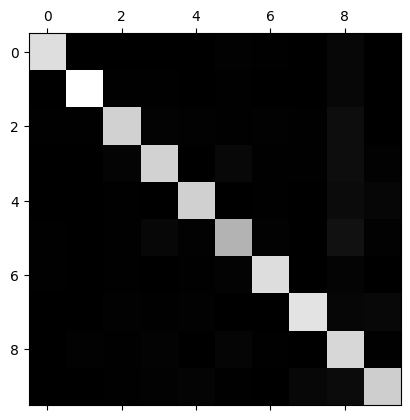

In [38]:
plt.matshow(
    conf_mx,
    cmap=plt.cm.gray
)

In [39]:
row_sums : np.ndarray = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx : np.ndarray = conf_mx / row_sums

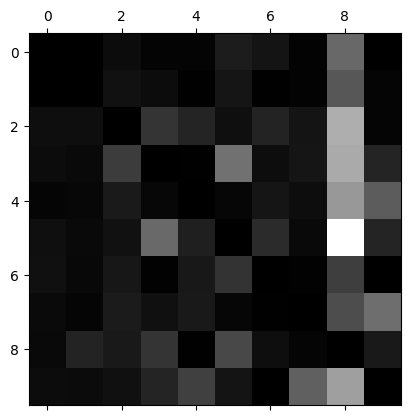

In [40]:
np.fill_diagonal(norm_conf_mx, 0)

plt.matshow(
    norm_conf_mx,
    cmap=plt.cm.gray
)

In [41]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

In [44]:
y_train_large : np.ndarray = (y_train >= 7)

In [45]:
y_train_odd : np.ndarray = (y_train % 2 == 1)

y_multilabel : np.ndarray = np.c_[y_train_large, y_train_odd]

In [46]:
knn_clf : KNeighborsClassifier = KNeighborsClassifier()

knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [47]:
knn_clf.predict([some_digit])

/home/pcmoraes/Desktop/codigos/Inteligencia-Artificial/Livros/Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])

In [48]:
y_train_knn_pred : np.ndarray = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

In [49]:
f1_score(
    y_multilabel,
    y_train_knn_pred,
    average='macro'
)

np.float64(0.9764102655606048)

In [50]:
noise : np.ndarray = np.random.randint(0, 100, (len(X_train), 784))

X_train_mod : np.ndarray = X_train + noise

noise : np.ndarray = np.random.randint(0, 100, (len(X_test), 784))

X_test_mod : np.ndarray = X_test + noise

y_train_mod : np.ndarray = X_train

y_test_mod : np.ndarray = X_test